In [14]:
import dask_awkward as dak
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
load_path = "/depot/cms/users/yun79/results/stage1/test_full2/f1_0"
sample = "vbf_powheg"
# full_load_path = load_path+f"/{sample}/*/*.parquet"
# full_load_path = load_path+f"/{sample}/0/*.parquet"
full_load_path = "/depot/cms/users/yun79/results/stage1/test_full2/2018/f1_0/vbf_powheg/0/*.parquet"

df_new = dak.from_parquet(full_load_path) 
# region_cut = (df_new.h_peak | df_new.h_sidebands)
# df_new = df_new[region_cut]

In [15]:
# hist_dimuon, edges = np.histogram(df_new[region_cut].dimuon_mass.compute(), bins=binning )
# plt.stairs(hist_dimuon, edges, label = "df_new")
# plt.legend(loc="upper right")

In [16]:
full_load_path = f"/depot/cms/users/yun79/hmm/test_validation/stage1_output/2018/{sample}/*.parquet"
import dask.dataframe as dd
import pandas as pd
# df = dd.from_pandas(pd.DataFrame(), npartitions=1)
df_old = dd.read_parquet(full_load_path)
# region = df_old.region.compute()

In [4]:
# print((region == "h-peak").sum())
# print((region == "h-sidebands").sum())

In [17]:
weights_new = df_new["weights"].compute()
print(weights_new)
print(ak.num(weights_new, axis=0))
weights_old = df_old["weights"].compute()
print(weights_old)
print(weights_old.shape)

[0.00491, 0.00491, 0.00491, 0.00491, ..., 0.00491, 0.00491, 0.00491, 0.00491]
9434
entry
1        0.004909
2        0.004909
3        0.004909
5        0.004909
6        0.004909
           ...   
10038    0.004909
10039    0.004909
10040    0.004909
10041    0.004909
10042    0.004909
Name: weights, Length: 9434, dtype: float32
(9434,)


In [18]:
weights_old[weights_old == np.min(weights_old)]

entry
2270   -0.004909
3587   -0.004909
4612   -0.004909
4620   -0.004909
7992   -0.004909
8121   -0.004909
8661   -0.004909
Name: weights, dtype: float32

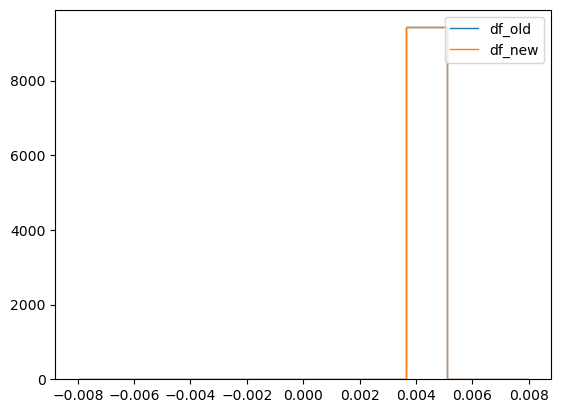

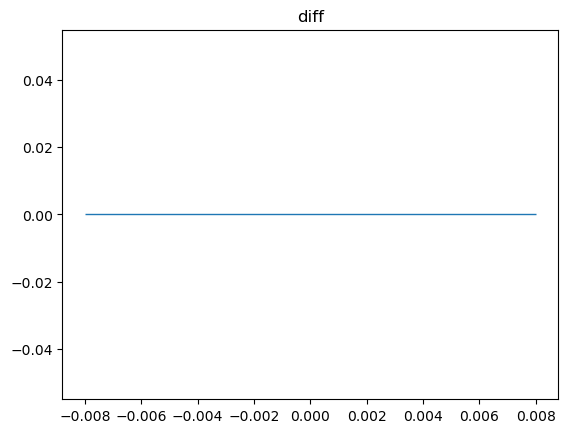

In [19]:
binning = np.linspace(*[-0.008, 0.008, 12])
hist_old, edges = np.histogram(weights_new, bins=binning )
hist_new, _= np.histogram(weights_old, bins=binning )
plt.stairs(hist_old, edges, label = "df_old")
plt.stairs(hist_new, edges, label = "df_new")
plt.legend(loc="upper right")
plt.show()
plt.stairs((hist_new-hist_old), edges)
plt.title("diff")
plt.show()

In [5]:
print(ak.sum(nmuons_new==2, axis=0))
print(nmuons_old[nmuons_old==2].shape)

6527
(6527,)


<function matplotlib.pyplot.show(close=None, block=None)>

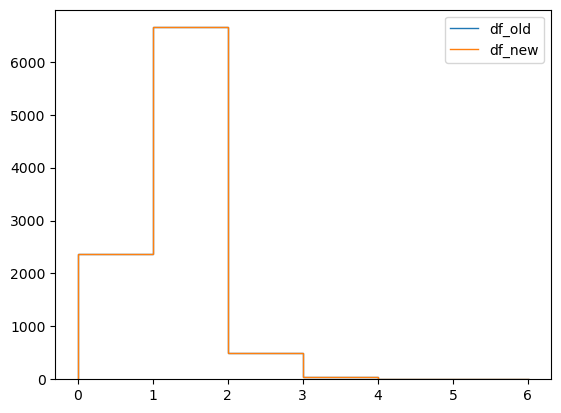

In [9]:
nmuons_new = df_new["nmuons"].compute()
print(nmuons_new)
nmuons_old = df_old["nmuons"].compute()
print(nmuons_old)
binning = np.linspace(*[0, 6.01, 7])
hist_old, edges = np.histogram(nmuons_new, bins=binning )
hist_new, _= np.histogram(nmuons_old, bins=binning )
plt.stairs(hist_old, edges, label = "df_old")
plt.stairs(hist_new, edges, label = "df_new")
plt.legend(loc="upper right")
plt.show

In [11]:
df_old[nmuons_old<2].compute()

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


,run,event,npv,met,LHEMass,mu1_pt,mu2_pt,nmuons,dataset
entry,,,,,,,,,
0,1,195003,20,38.692532,0,18.547428,18.547428,1.0,vbf_powheg
2,1,195006,17,20.669426,0,74.524536,74.524536,1.0,vbf_powheg
8,1,195010,24,78.072212,0,51.610859,51.610859,1.0,vbf_powheg
28,1,195018,30,155.556717,0,24.212162,24.212162,1.0,vbf_powheg
31,1,195034,23,20.897215,0,132.282867,132.282867,1.0,vbf_powheg
...,...,...,...,...,...,...,...,...,...
10025,1,619037,21,8.845778,0,60.765217,60.765217,1.0,vbf_powheg
10030,1,619028,37,125.761681,0,31.148886,31.148886,1.0,vbf_powheg
10034,1,619036,25,77.338600,0,28.174803,28.174803,1.0,vbf_powheg


In [3]:
print(ak.min(df_old["mu1_pt"].compute()))
print(ak.min(df_new["mu1_pt"].compute()))
print(ak.min(df_old["mu2_pt"].compute()))
print(ak.min(df_new["mu2_pt"].compute()))

3.026836633682251
3.0268366
3.000633716583252
3.0006337


In [16]:
print(ak.num(df_old["mu1_pt"].compute(), axis=0))
print(ak.num(df_new["mu1_pt"].compute(), axis=0))
print(ak.num(df_old[nmuons_old >1]["mu2_pt"].compute(), axis=0))
# print(df_old[nmuons_old >1]["mu2_pt"].compute().shape)
print(ak.num(df_new[nmuons_new >1]["mu2_pt"].compute(), axis=0))

9770
9770
8055
8055


/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


In [14]:
df_new["mu2_pt"] >

,run,event,npv,met,LHEMass,mu1_pt,mu2_pt,dataset
entry,,,,,,,,


In [6]:
print(ak.sum((df_old["mu1_pt"] > 0).compute(), axis=0))

9770


In [11]:
binning_map = {
    "pt" : [25, 300, 50],
    "eta" : [-5, 5, 30],
    "phi" : [-3.1415, 3.1415, 101],
    "mass" : [0, 150, 100],
}

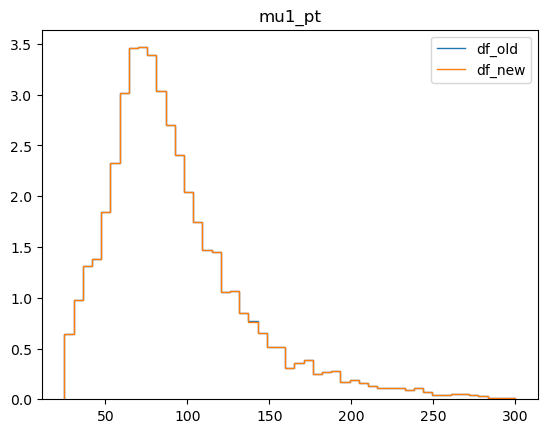

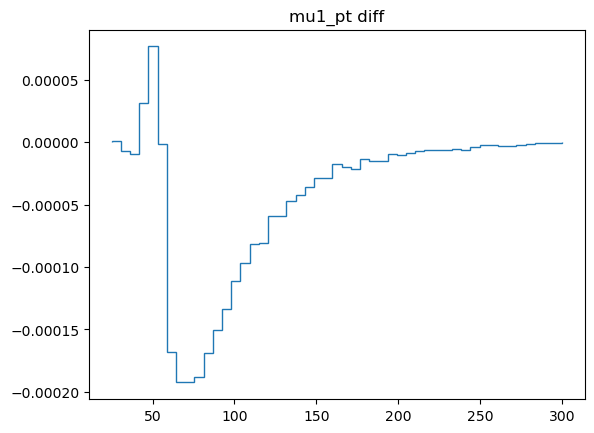

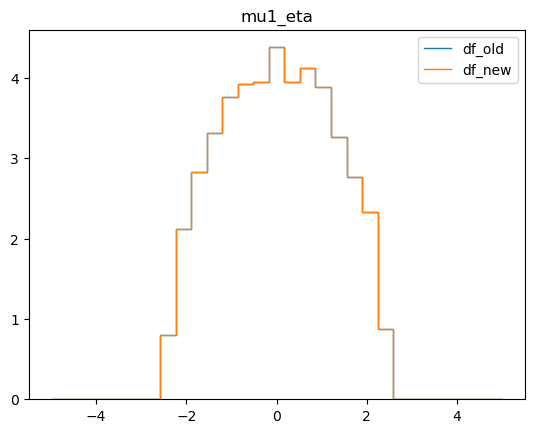

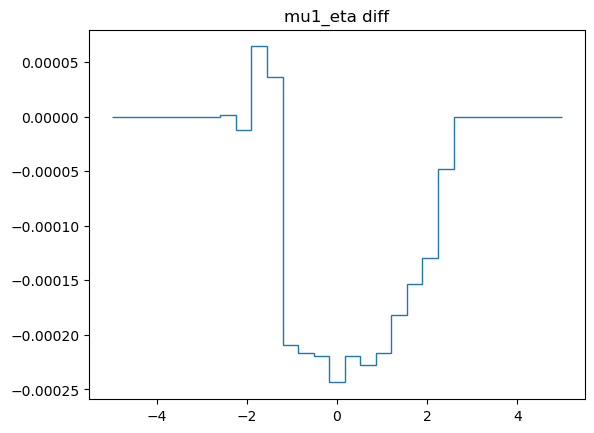

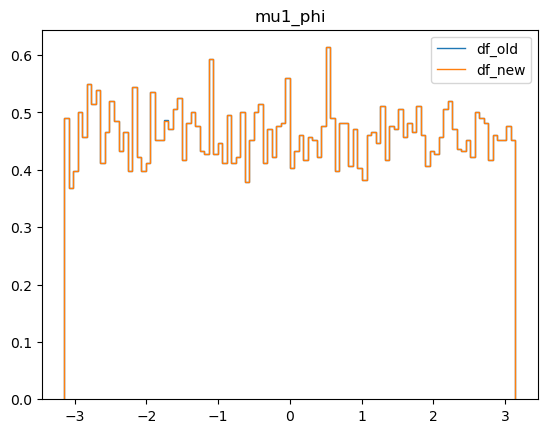

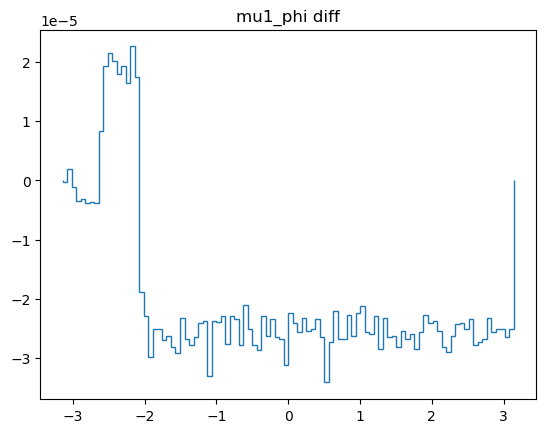

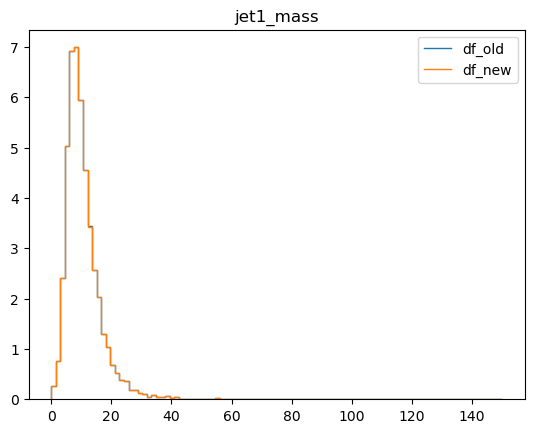

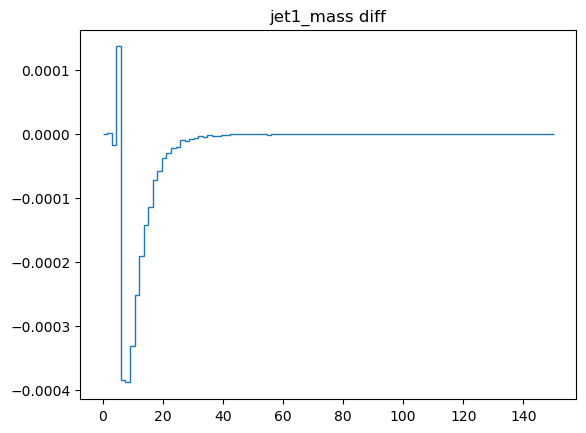

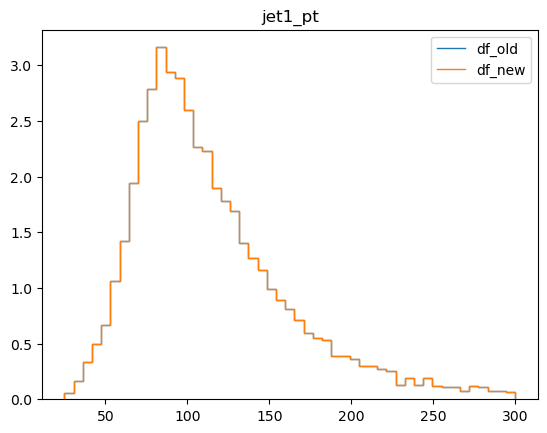

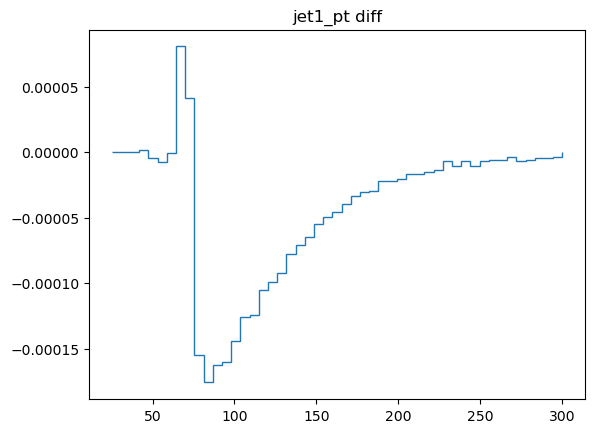

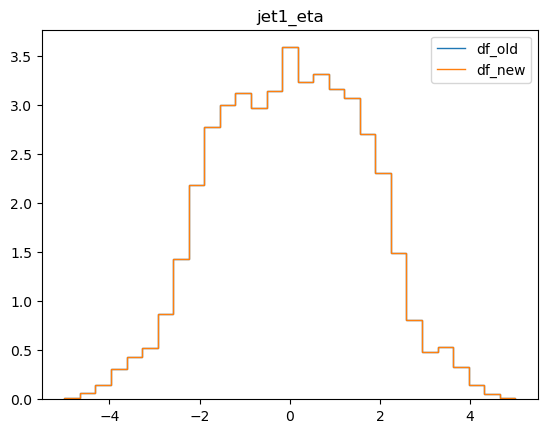

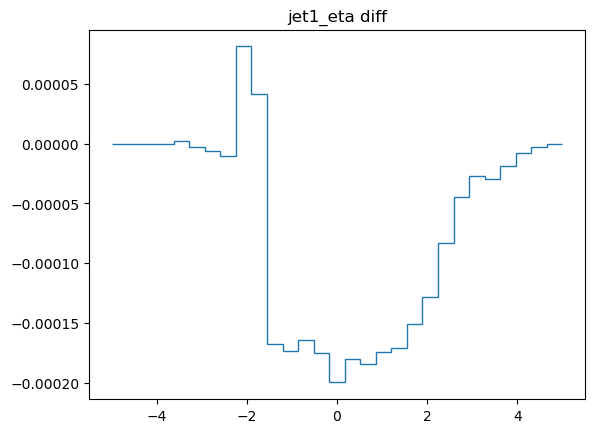

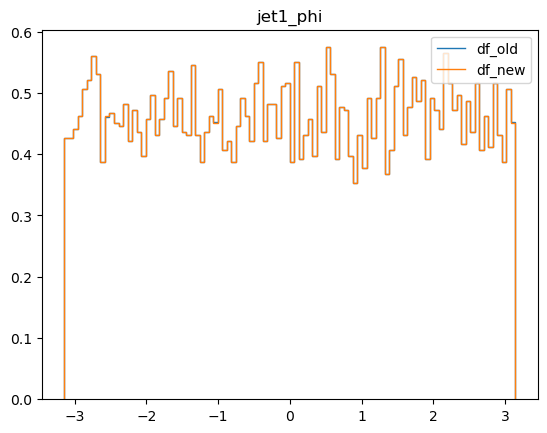

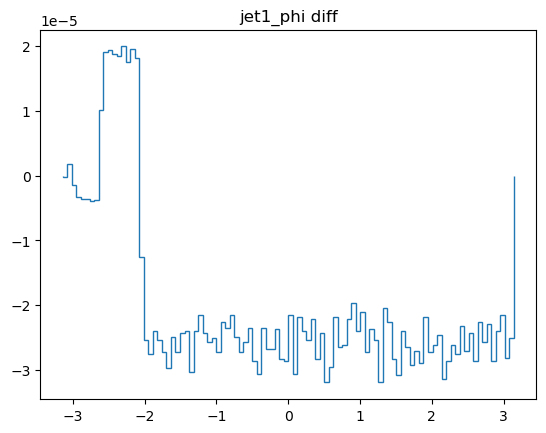

In [20]:
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu1_pt","mu1_eta", "mu1_phi", 
             "jet1_mass", "jet1_pt", "jet1_eta", "jet1_phi"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())


for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # old_len = ak.num(df_old["mu1_pt"].compute(), axis=0)
    # new_len = ak.num(df_new["mu1_pt"].compute(), axis=0)
    # new_weights = np.ones(new_len)
    # new_weights = new_weights*old_len/new_len
    hist_old, edges = np.histogram(df_old[var].compute(), bins=binning ,weights=weights_old)
    # hist_old, edges = np.histogram(df_old[var+"_nominal"].compute(), bins=binning )
    
    # hist_new, _= np.histogram(df_new[region_cut][var].compute(), bins=binning , weights=new_weights)
    hist_new, _= np.histogram(df_new[var].compute(), bins=binning ,weights=weights_new)
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.show()

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


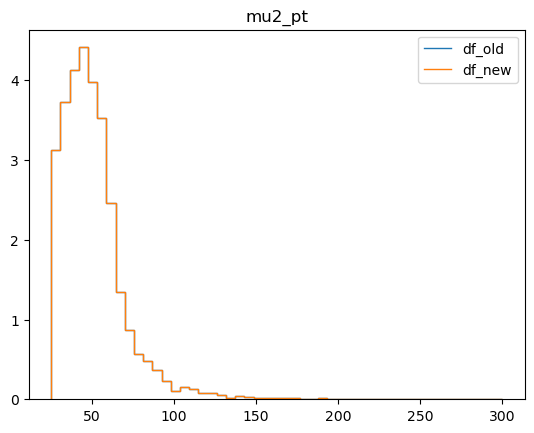

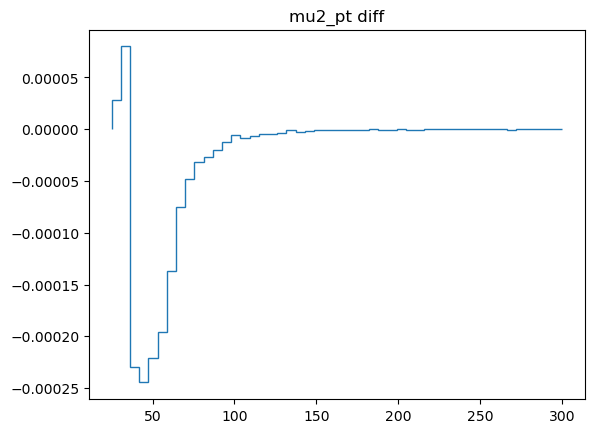

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


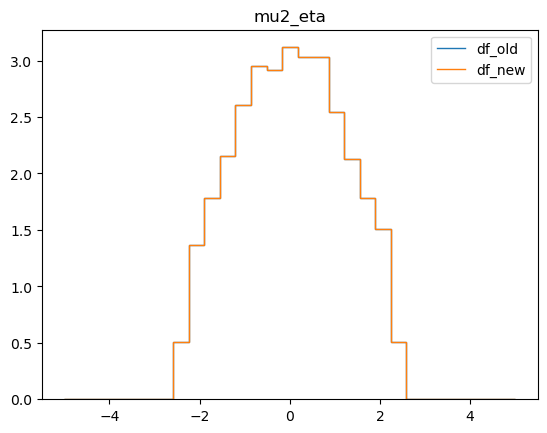

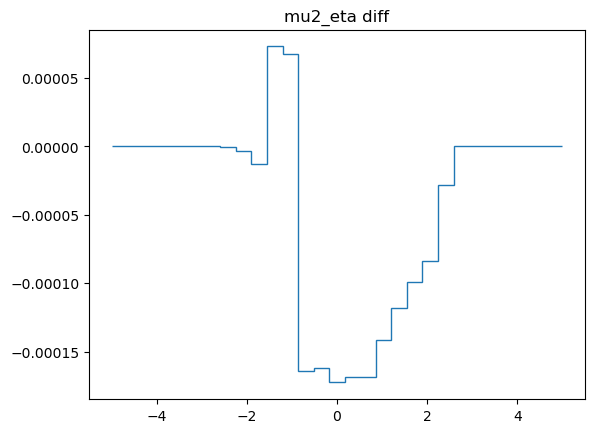

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


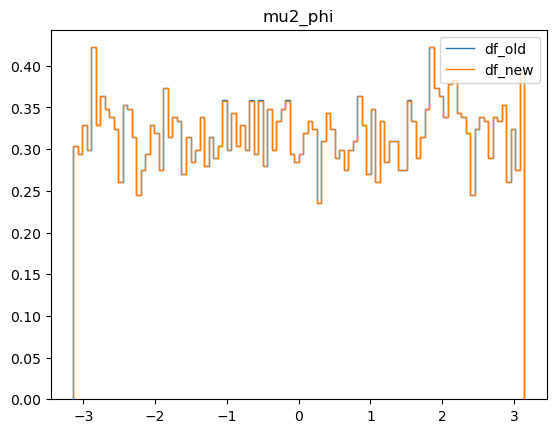

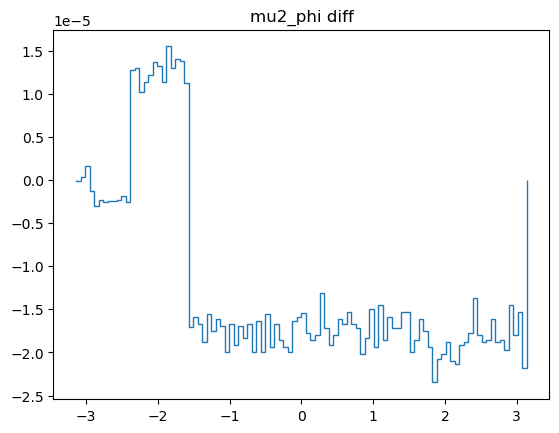

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


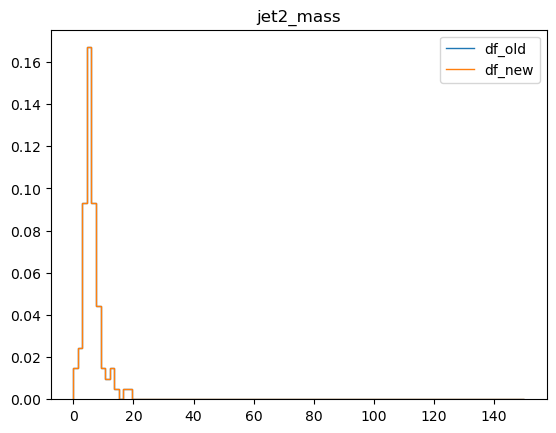

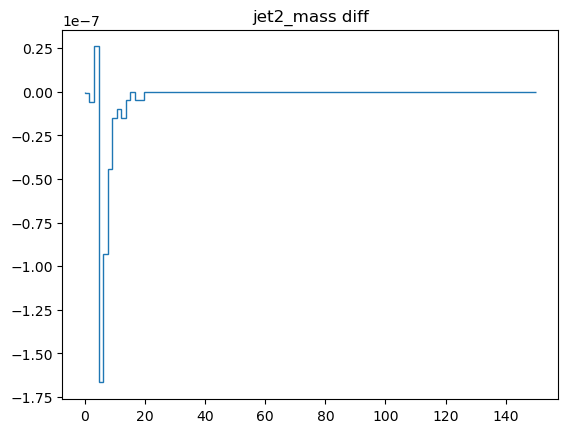

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


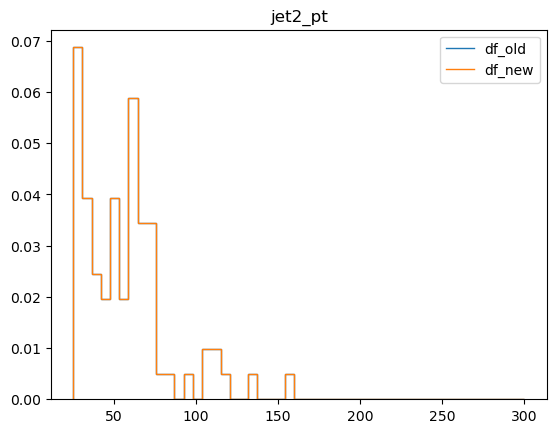

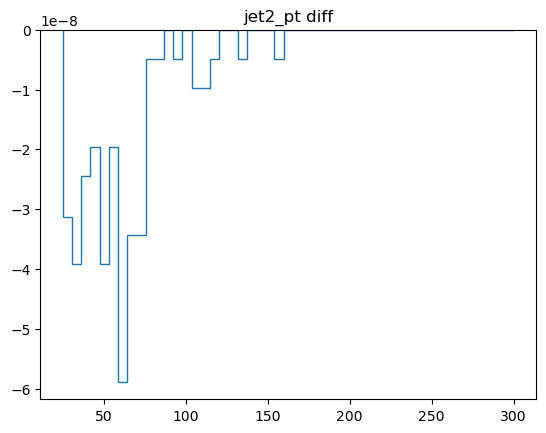

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


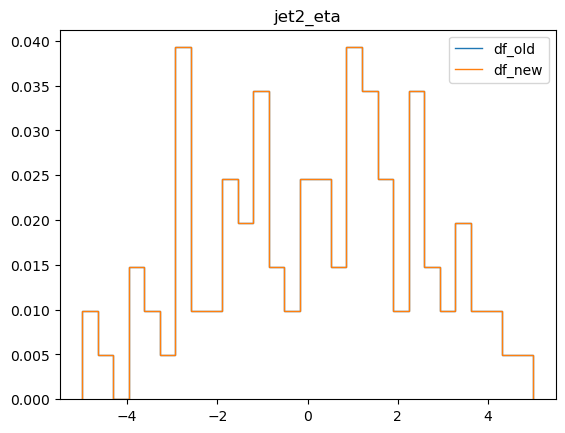

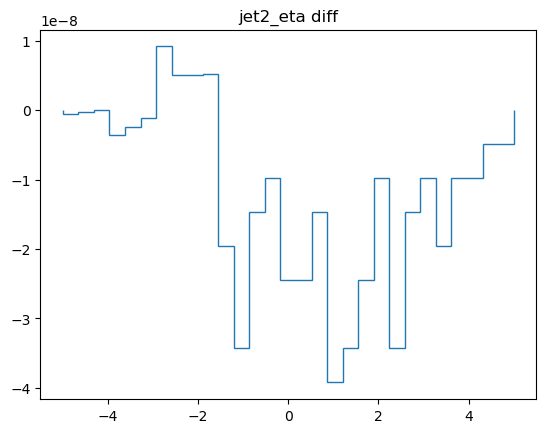

/depot/cms/kernels/coffea2024/lib/python3.10/site-packages/dask/dataframe/core.py:5181: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  meta = self._meta[_extract_meta(key)]


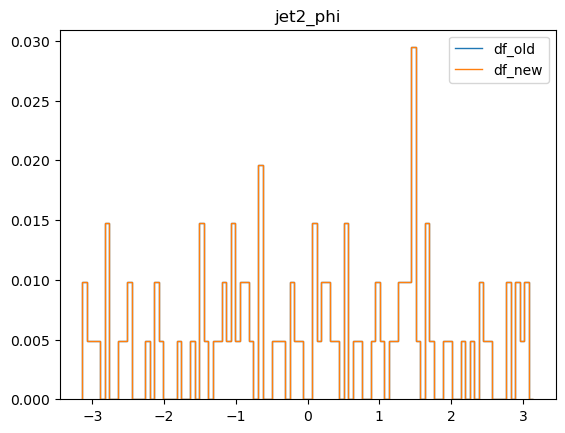

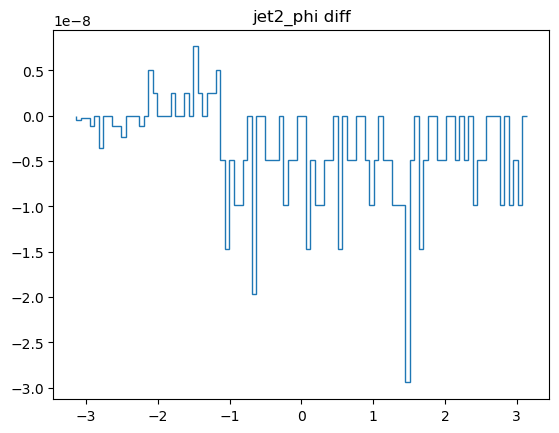

In [21]:
"""
For mu2, special condition is needed bc when there's only one muon, mu2==mu1 in copperhead
"""
# var = "mu1_pt"
# var = "dimuon_mass"
# var = "jet1_pt"
# variables = ["mu1_pt", "mu2_pt", "dimuon_mass"]
variables = ["mu2_pt","mu2_eta", "mu2_phi", 
             "jet2_mass", "jet2_pt", "jet2_eta", "jet2_phi"
            ]
weights_old = df_old["weights"].compute()
weights_new = ak.to_numpy(df_new["weights"].compute())
for var in variables:
    kin = var.split("_")[-1]
    # binning = np.linspace(*[25, 300, 50])
    binning = np.linspace(*binning_map[kin])
    # the way copperheadV1 defines mu2 is the muon with the lowest pt, thus the
    # only way to make copperheadV1 and copperheadV2 same is to ensure nmuons ==2
    if 'mu' in var:
        nvars_new = df_new["nmuons"].compute()
        nvars_old = df_old["nmuons"].compute()
    else:
        nvars_new = df_new["njets"].compute()
        nvars_old = df_old["njets"].compute()
    hist_old, edges = np.histogram(df_old[nvars_old ==2][var].compute(), bins=binning , weights=weights_old[nvars_old ==2])
    hist_new, _= np.histogram(df_new[nvars_new ==2][var].compute(), bins=binning , weights=weights_new[nvars_new ==2])
    
    plt.stairs(hist_old, edges, label = "df_old")
    plt.stairs(hist_new, edges, label = "df_new")
    plt.legend(loc="upper right")
    plt.title(var)
    plt.show()
    plt.stairs((hist_new-hist_old), edges)
    plt.title(var+" diff")
    plt.show()

In [20]:
nvars_new = df_new["jet1_mass"].compute()
nvars_old = df_old["jet1_mass"].compute()
# nvars_old
np.max(nvars_new)

141.125

In [21]:
diff = hist_old-hist_new
len(diff[diff !=0])

0

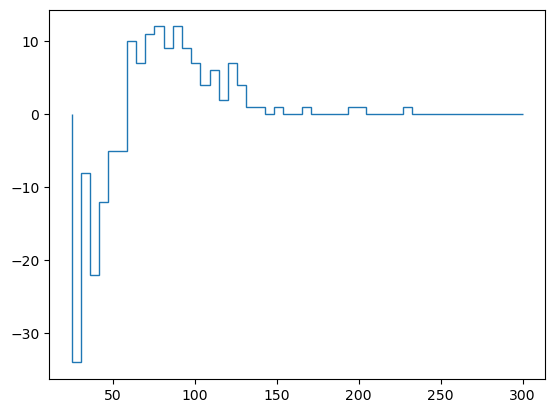

In [ ]:
# df_old.fields
# df_old["mu1_pt"].compute()
# df_old["region"].compute()
# df_old["wgt_nominal"].compute()


In [43]:
# (df_old).fields
regions = df_old.region.compute() 

In [59]:
# import dask.dataframe as dd
# import pandas as pd
# # df = dd.from_pandas(pd.DataFrame(), npartitions=1)
# df = dd.read_parquet(full_load_path)
# region = df.region.compute()

In [55]:
region== "h-peak"

entry
3067      True
4094     False
4405      True
6031     False
6797      True
         ...  
90309    False
90479    False
92886     True
94390    False
95004     True
Name: region, Length: 89712, dtype: bool[pyarrow]

In [60]:
region

entry
3067          h-peak
4094     h-sidebands
4405          h-peak
6031     h-sidebands
6797          h-peak
            ...     
90309    h-sidebands
90479    h-sidebands
92886         h-peak
94390    h-sidebands
95004         h-peak
Name: region, Length: 89712, dtype: string

In [58]:
df.columns

Index(['LHEMass', 'dataset', 'dimuon_cos_theta_cs', 'dimuon_cos_theta_cs_pisa',
       'dimuon_dEta', 'dimuon_dPhi', 'dimuon_dR', 'dimuon_ebe_mass_res',
       'dimuon_ebe_mass_res_rel', 'dimuon_eta', 'dimuon_mass', 'dimuon_phi',
       'dimuon_phi_cs', 'dimuon_phi_cs_pisa', 'dimuon_pisa_mass_res',
       'dimuon_pisa_mass_res_rel', 'dimuon_pt', 'dimuon_pt_log', 'event',
       'htsoft2_nominal', 'htsoft5_nominal', 'jet1_eta_nominal',
       'jet1_has_matched_gen_nominal', 'jet1_phi_nominal', 'jet1_pt_nominal',
       'jet1_qgl_nominal', 'jet2_eta_nominal', 'jet2_has_matched_gen_nominal',
       'jet2_phi_nominal', 'jet2_pt_nominal', 'jet2_qgl_nominal',
       'jj_dEta_nominal', 'jj_dPhi_nominal', 'jj_eta_nominal',
       'jj_mass_nominal', 'jj_mass_log_nominal', 'jj_phi_nominal',
       'jj_pt_nominal', 'll_zstar_log_nominal', 'met', 'mmj1_dEta_nominal',
       'mmj1_dPhi_nominal', 'mmj2_dEta_nominal', 'mmj2_dPhi_nominal',
       'mmj_min_dEta_nominal', 'mmj_min_dPhi_nominal', 'mmjj_e

In [ ]:
1267979